In [7]:
#Same analysis done in Testing Code 4. Except with binary data in localization column and also logistic regression. 
import os
print(os.getcwd())
print("\n", os.listdir()) # list items in current working directory after "\n" return key

C:\Users\hankc\OneDrive\Documents\GitHub\ciliary_proteomes_and_js_exomes

 ['.git', '.ipynb_checkpoints', 'Cellbody_and_cilia+_fraction.xlsx', 'cellBody_only.xlsx', 'CellBody_only_Repaired.xlsx', 'Cheng_Grout_final_project.ipynb', 'Cilia_only_fraction.xlsx', 'Experimental_Copy.ipynb', 'Hank Testing Code 2.ipynb', 'Hank Testing Code 3.ipynb', 'Hank Testing Code 4.ipynb', 'Hank_Testing_Code.ipynb', 'Hank_Version.ipynb', 'HC-JSexomes_2_output_1percentExAC_Corrected.xlsx', 'HC1_js_exomes_2_MG_170307.xlsx', 'JSexomes_1_1percentExAC_reAnn138_output_new.txt', 'JSexomes_2_output_1percentExAC.xlsx', 'JSexomes_2_output_1percentExAC_Corrected - Copy.xlsx', 'JSexomes_2_output_1percentExAC_Corrected.xlsx', 'js_exomes_2_MG_170307.xlsx', 'js_genes.txt', 'README.md', 'Testing Code']


In [1]:
# NA values removed and 0 values for localization column removed.

# preliminaries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

exome = pd.read_excel("HC3_js_exomes_2_MG_170307.xlsx")
exome.head

<bound method NDFrame.head of                          Chromosome   Position ReferenceAllele  \
0      8084Trio.final_output.txt 10  101510116               C   
1      8084Trio.final_output.txt 10  103717493               T   
2      8084Trio.final_output.txt 10  104263946               A   
3      8084Trio.final_output.txt 10  104263949               G   
4      8084Trio.final_output.txt 10  104263963               T   
5      8084Trio.final_output.txt 10  104679140               C   
6      8084Trio.final_output.txt 10  111893349               C   
7      8084Trio.final_output.txt 10  112361765               G   
8      8084Trio.final_output.txt 10  117823963               C   
9      8084Trio.final_output.txt 10  118738802               C   
10     8084Trio.final_output.txt 10  118738802               C   
11     8084Trio.final_output.txt 10  120938290               C   
12     8084Trio.final_output.txt 10  121691666               G   
13     8084Trio.final_output.txt 10   12272989

In [2]:
exomeFiltered = exome.loc[:, ['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' ,'localization', 'js_cause']]

In [3]:
exome.shape

(10213, 42)

In [4]:
exomeLoc = exomeFiltered.loc[:,['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' , 'localization']]
exomeJS = exomeFiltered.loc[:,['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' , 'js_cause']]
exomeTest = exomeFiltered.loc[:,['GERP','CADD_score', 'Dist2Splice','AB', 'P1_AltFreq', 'P2_AltFreq' ]]
exomeTest.shape

(10213, 6)

array([ 0.99999557,  0.99999936,  1.        ,  1.        ,  1.        ,  1.        ])

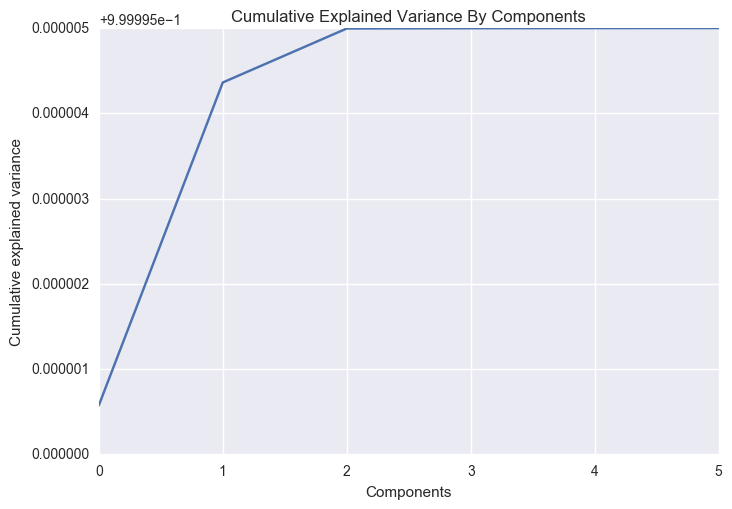

In [5]:
#PCA portion of the analysis
eigenVariant = PCA()
eigenVariant.fit(exomeTest)

plt.plot(np.cumsum(eigenVariant.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance By Components')
np.cumsum(eigenVariant.explained_variance_ratio_)

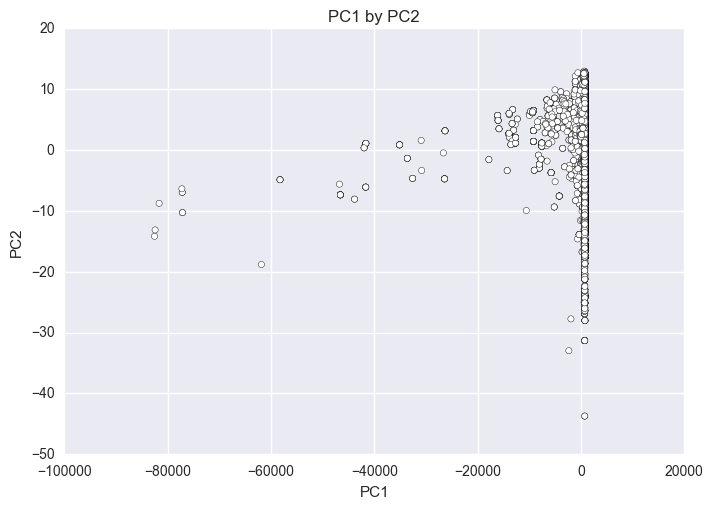

In [7]:
#PC plot colored by js_cause
variants_red = eigenVariant.transform(exomeTest)
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), c=exome['js_cause'])
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

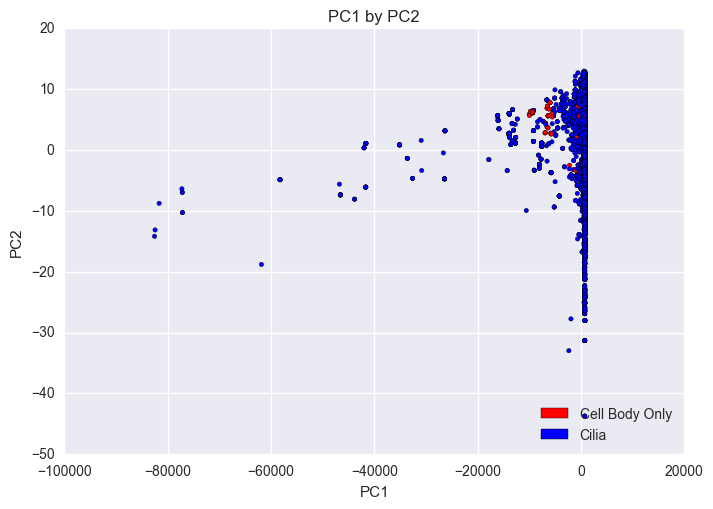

In [8]:
#PC plot colored by localization
import matplotlib.patches as mpatches
variants_red = eigenVariant.transform(exomeTest)
exomeColor = exome['localization'].replace([0,1],['red','blue'])
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), c= exomeColor, s=10)
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
classes = ['Cell Body Only','Cilia']
class_colours = ['red','blue']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)

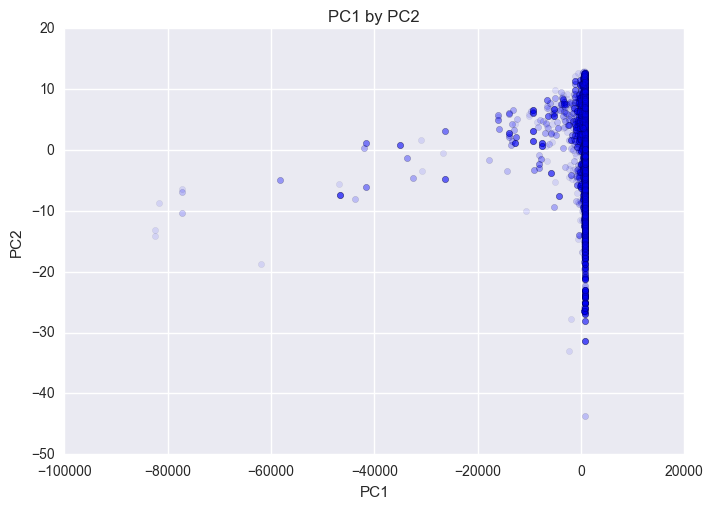

In [9]:
#PC plot with transparent points to shown frequency of points
import matplotlib.patches as mpatches
variants_red = eigenVariant.transform(exomeTest)
exomeColor = exome['js_cause'].replace([0,1],['red','blue'])
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), alpha=0.1)
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

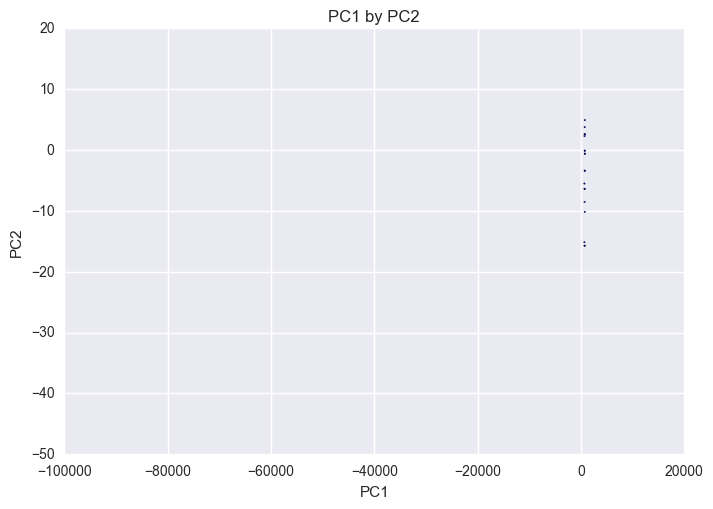

In [10]:
#PC plot with only JS causative variants.
variants_red = eigenVariant.transform(exomeTest)
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), exome['js_cause']==1)
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")

ValueError: to_rgba: Invalid rgba arg "0"
to_rgb: Invalid rgb arg "0"
cannot convert argument to rgb sequence

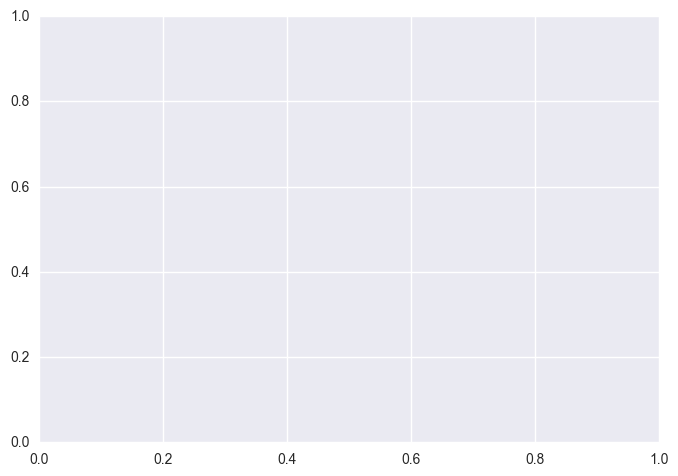

In [11]:
#PC plot colored by localization including only JS causative variants
import matplotlib.patches as mpatches
variants_red = eigenVariant.transform(exomeTest)
exomeColor = exome['localization'].replace([1,2,3],['red','yellow','black'])
plt.scatter(variants_red[:, 0].flatten(),variants_red[:, 1].flatten(), exome['js_cause']==1, c= exomeColor ) # need to make this work
plt.title("PC1 by PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
classes = ['Cell Body Only','Cilia Only','Cell body and Cilia']
class_colours = ['red','yellow','black']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)

[1 1 1 ..., 1 1 1]


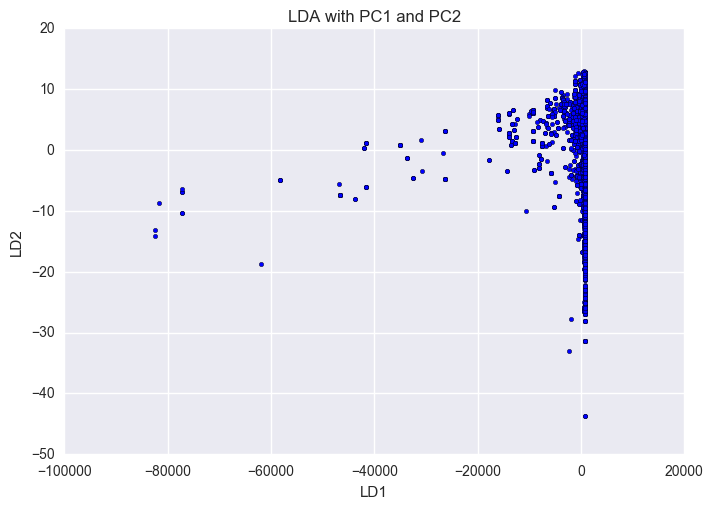

In [12]:
#LDA with localization data
model = LinearDiscriminantAnalysis()

X = variants_red[:,[0,1]]
y = exome['localization']

model.fit(X, y)

predicted = model.predict(X)

print(predicted)

for loco in set(predicted):
    plt.scatter(X[predicted==loco,0], X[predicted==loco,1], s=10)
plt.title("LDA with PC1 and PC2")
plt.xlabel("LD1")
plt.ylabel("LD2")

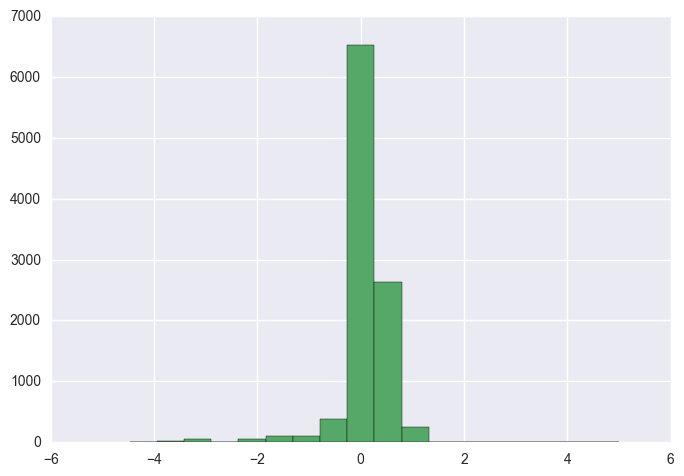

In [13]:
X_new = model.transform(X)

for loco in set(predicted):
    plt.hist(X_new[predicted==loco], bins=np.linspace(-5,5,20)) 

[0 0 0 ..., 0 0 0]


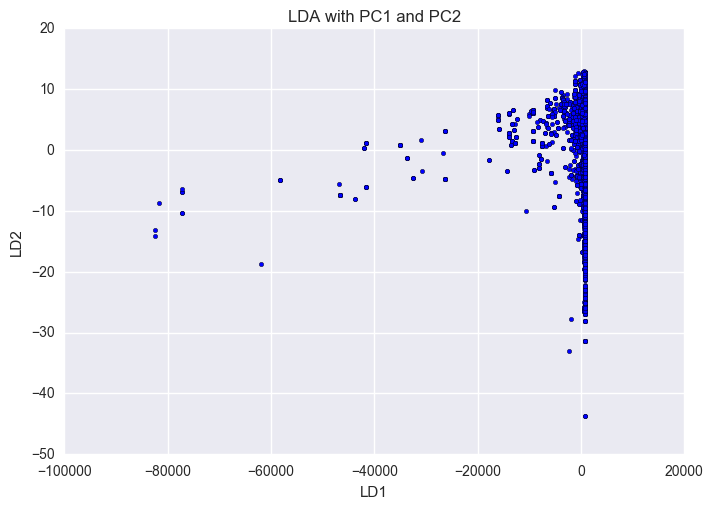

In [14]:
#LDA with JS data
model = LinearDiscriminantAnalysis()

X = variants_red[:,[0,1]]
y = exome['js_cause']

model.fit(X, y)

predicted = model.predict(X)

print(predicted)

for JS in set(predicted):
    plt.scatter(X[predicted==JS,0], X[predicted==JS,1], s=10)
plt.title("LDA with PC1 and PC2")
plt.xlabel("LD1")
plt.ylabel("LD2")

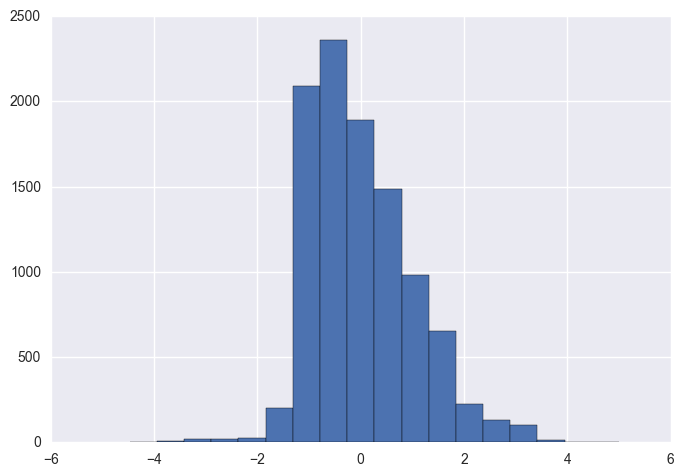

In [15]:
X_new = model.transform(X)

for loco in set(predicted):
    plt.hist(X_new[predicted==loco], bins=np.linspace(-5,5,20)) 

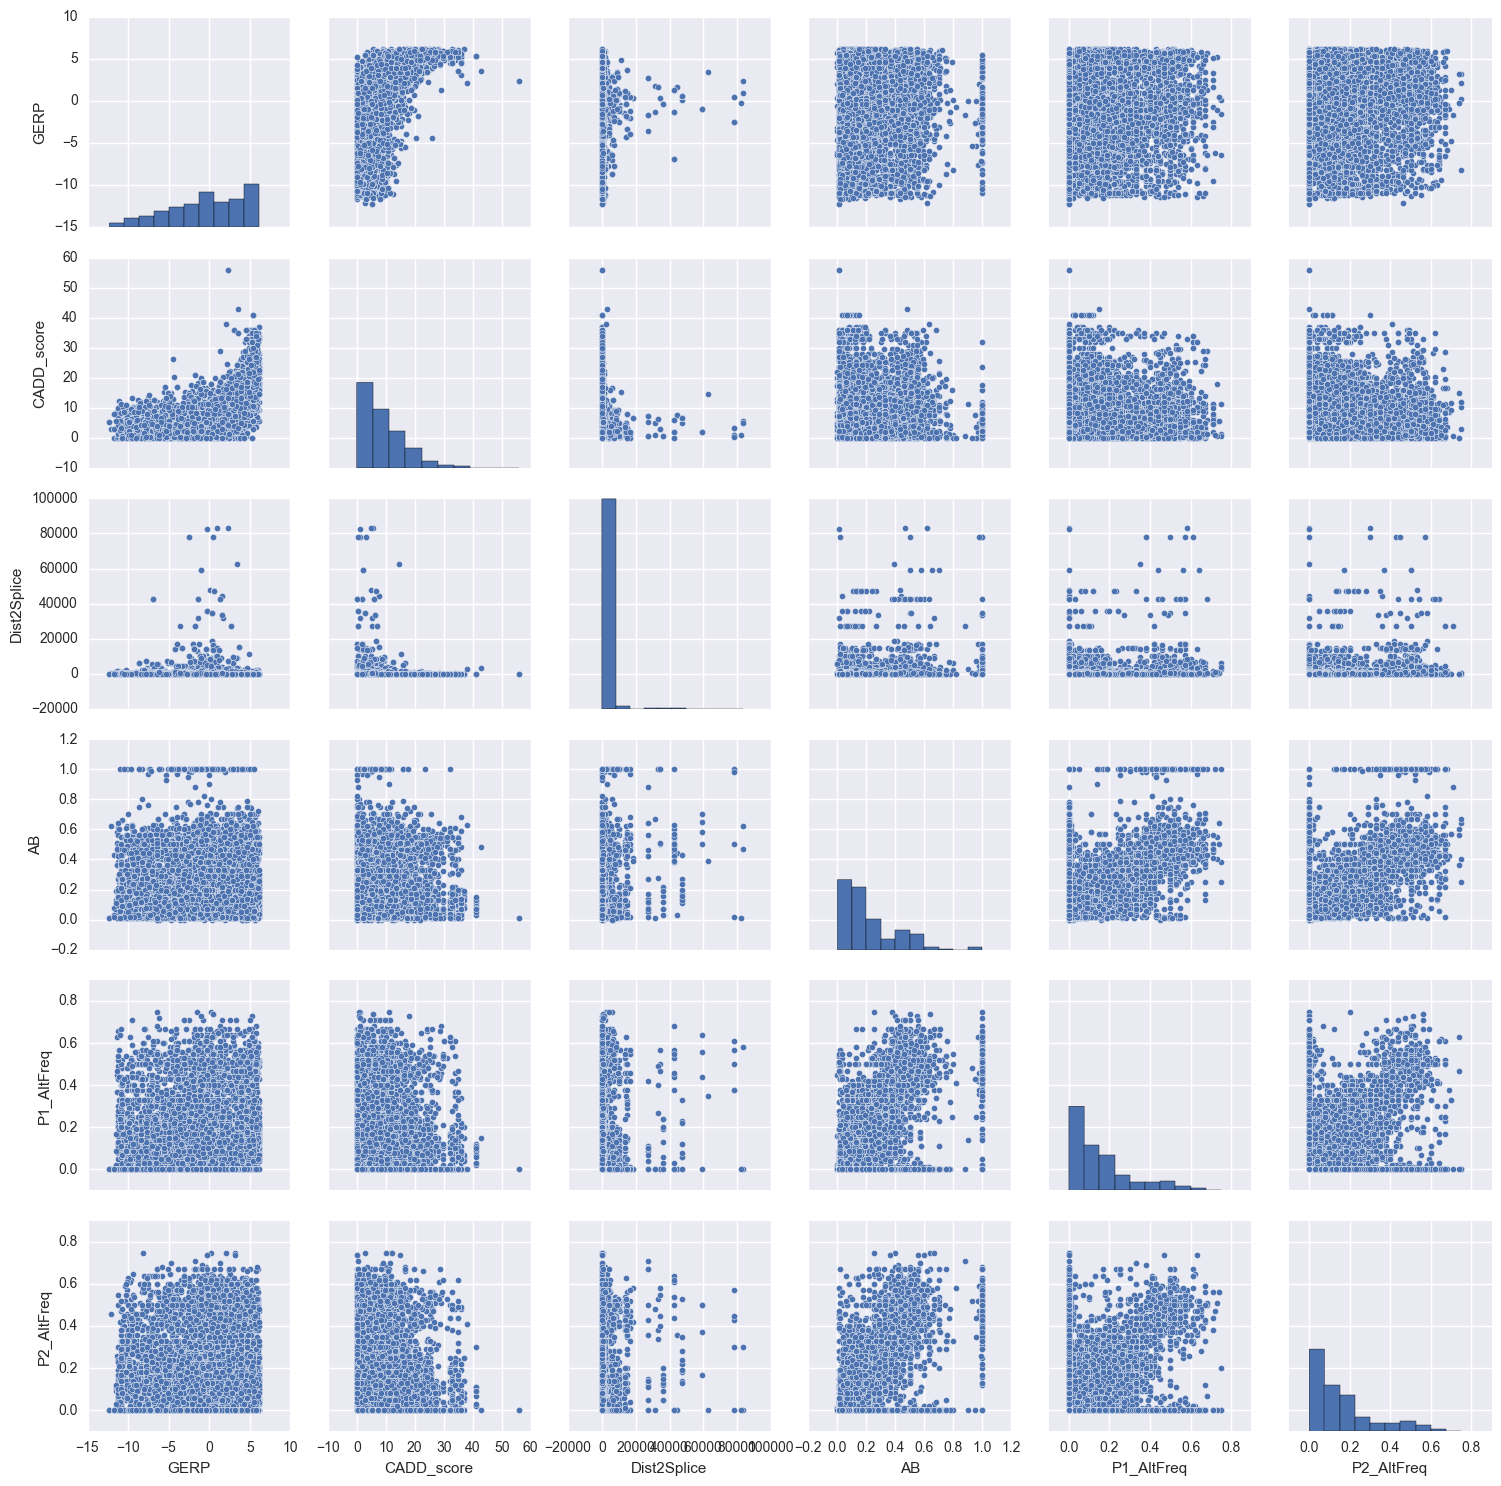

In [16]:
sns.pairplot(exomeTest)

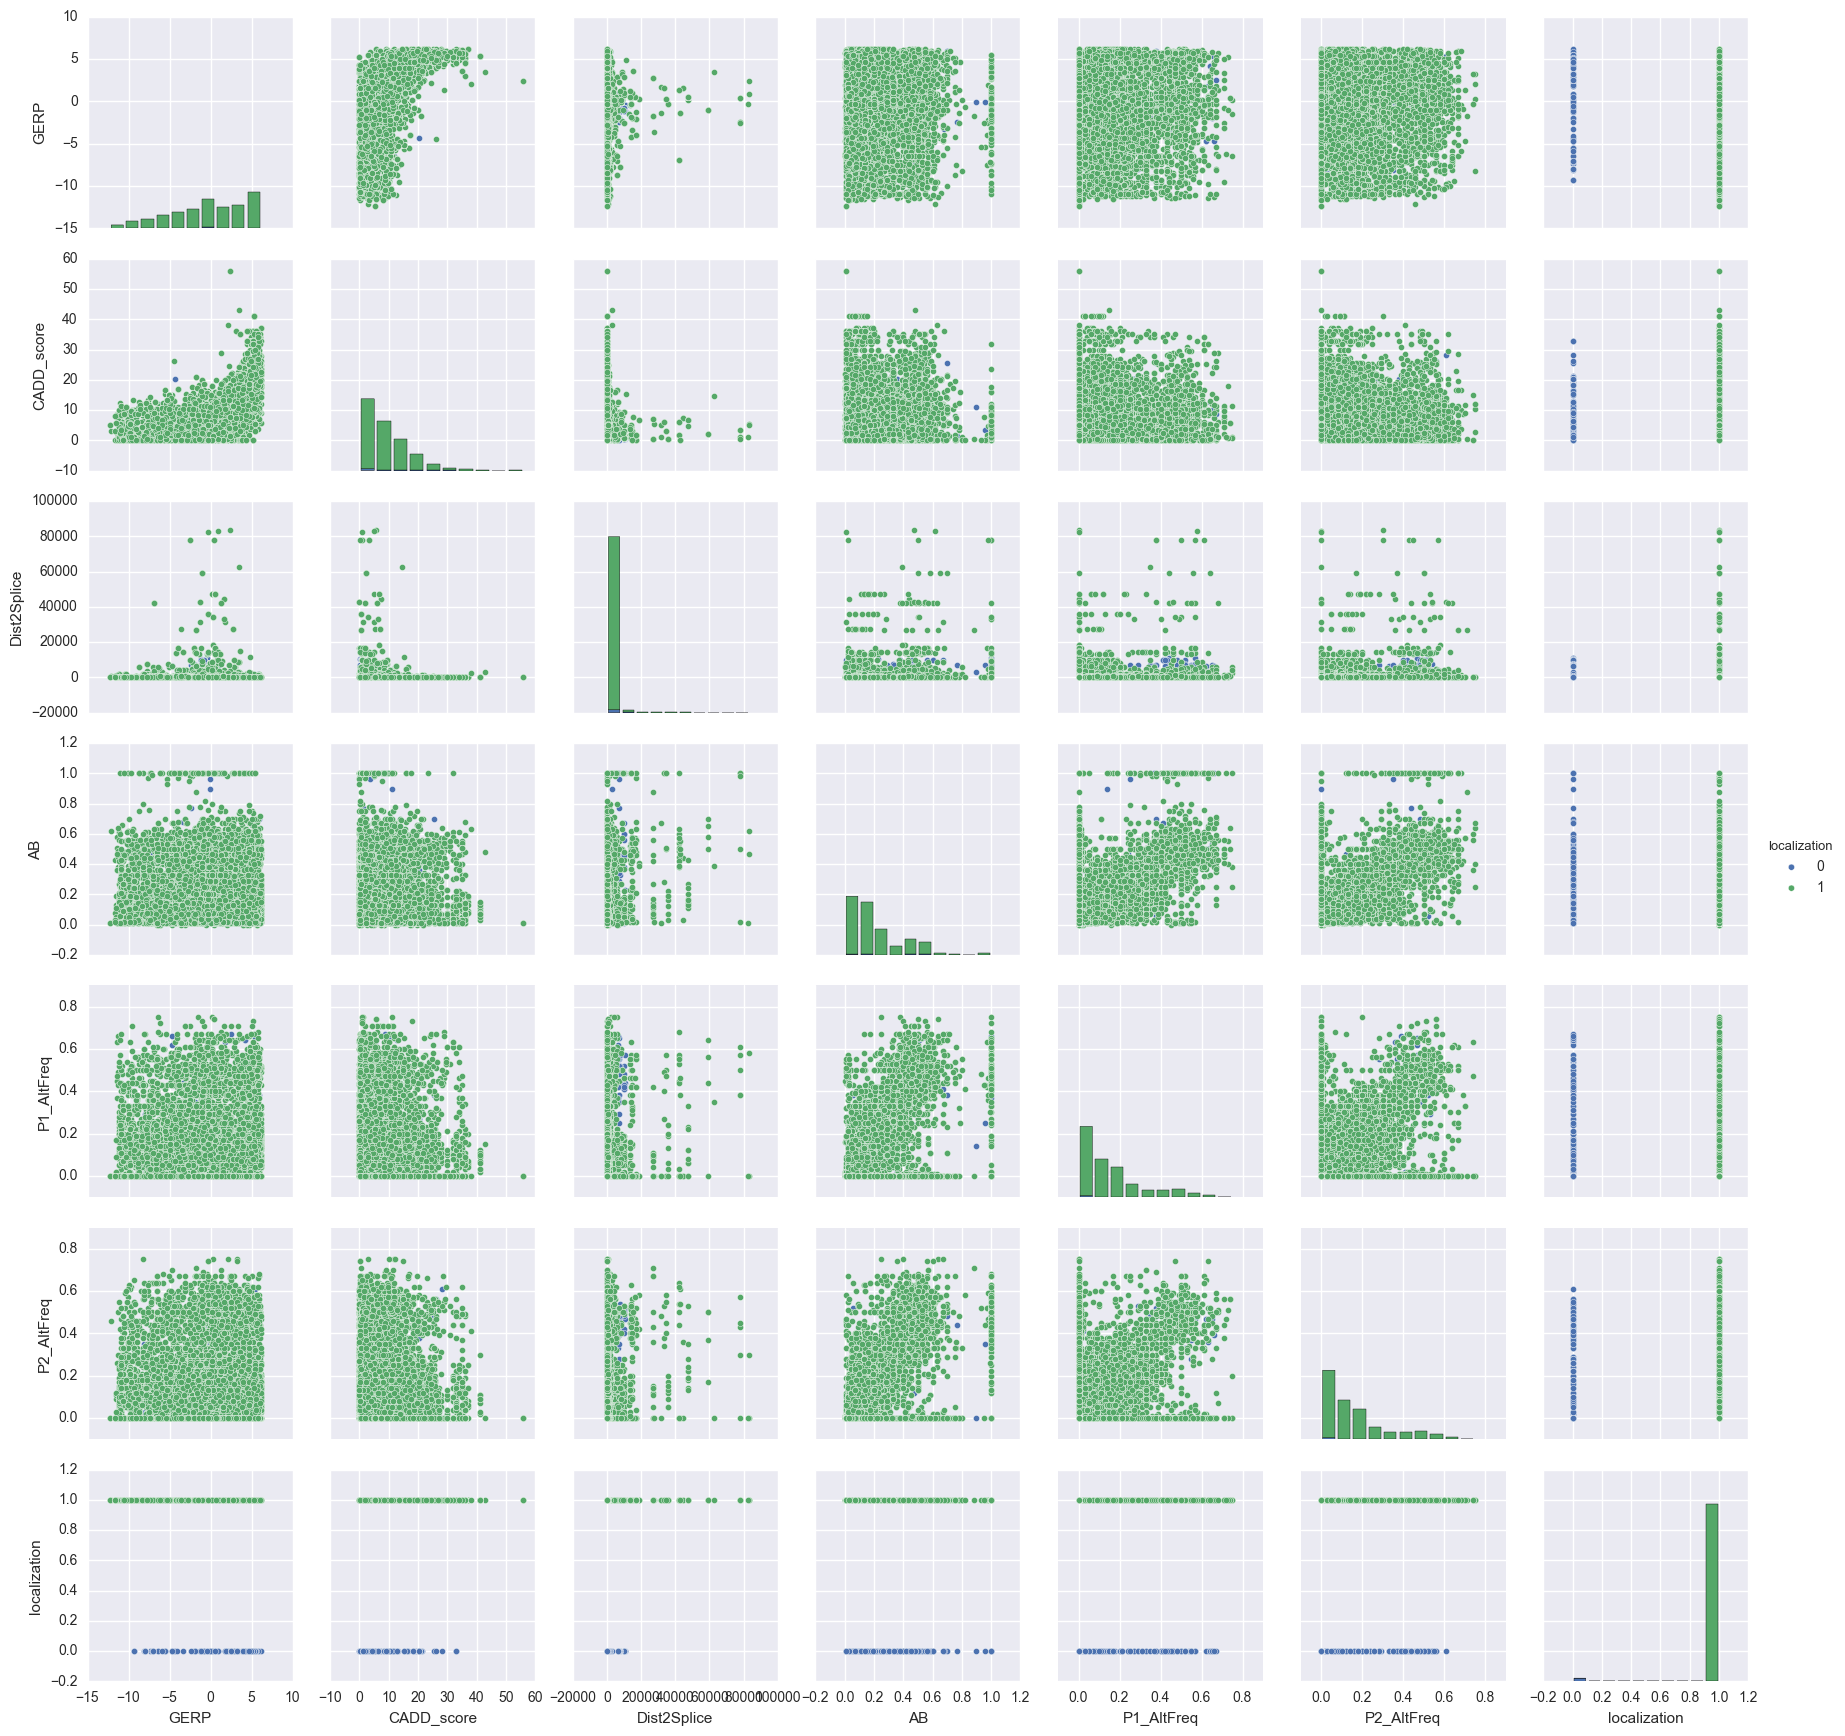

In [17]:
sns.pairplot(exomeLoc, hue = 'localization')

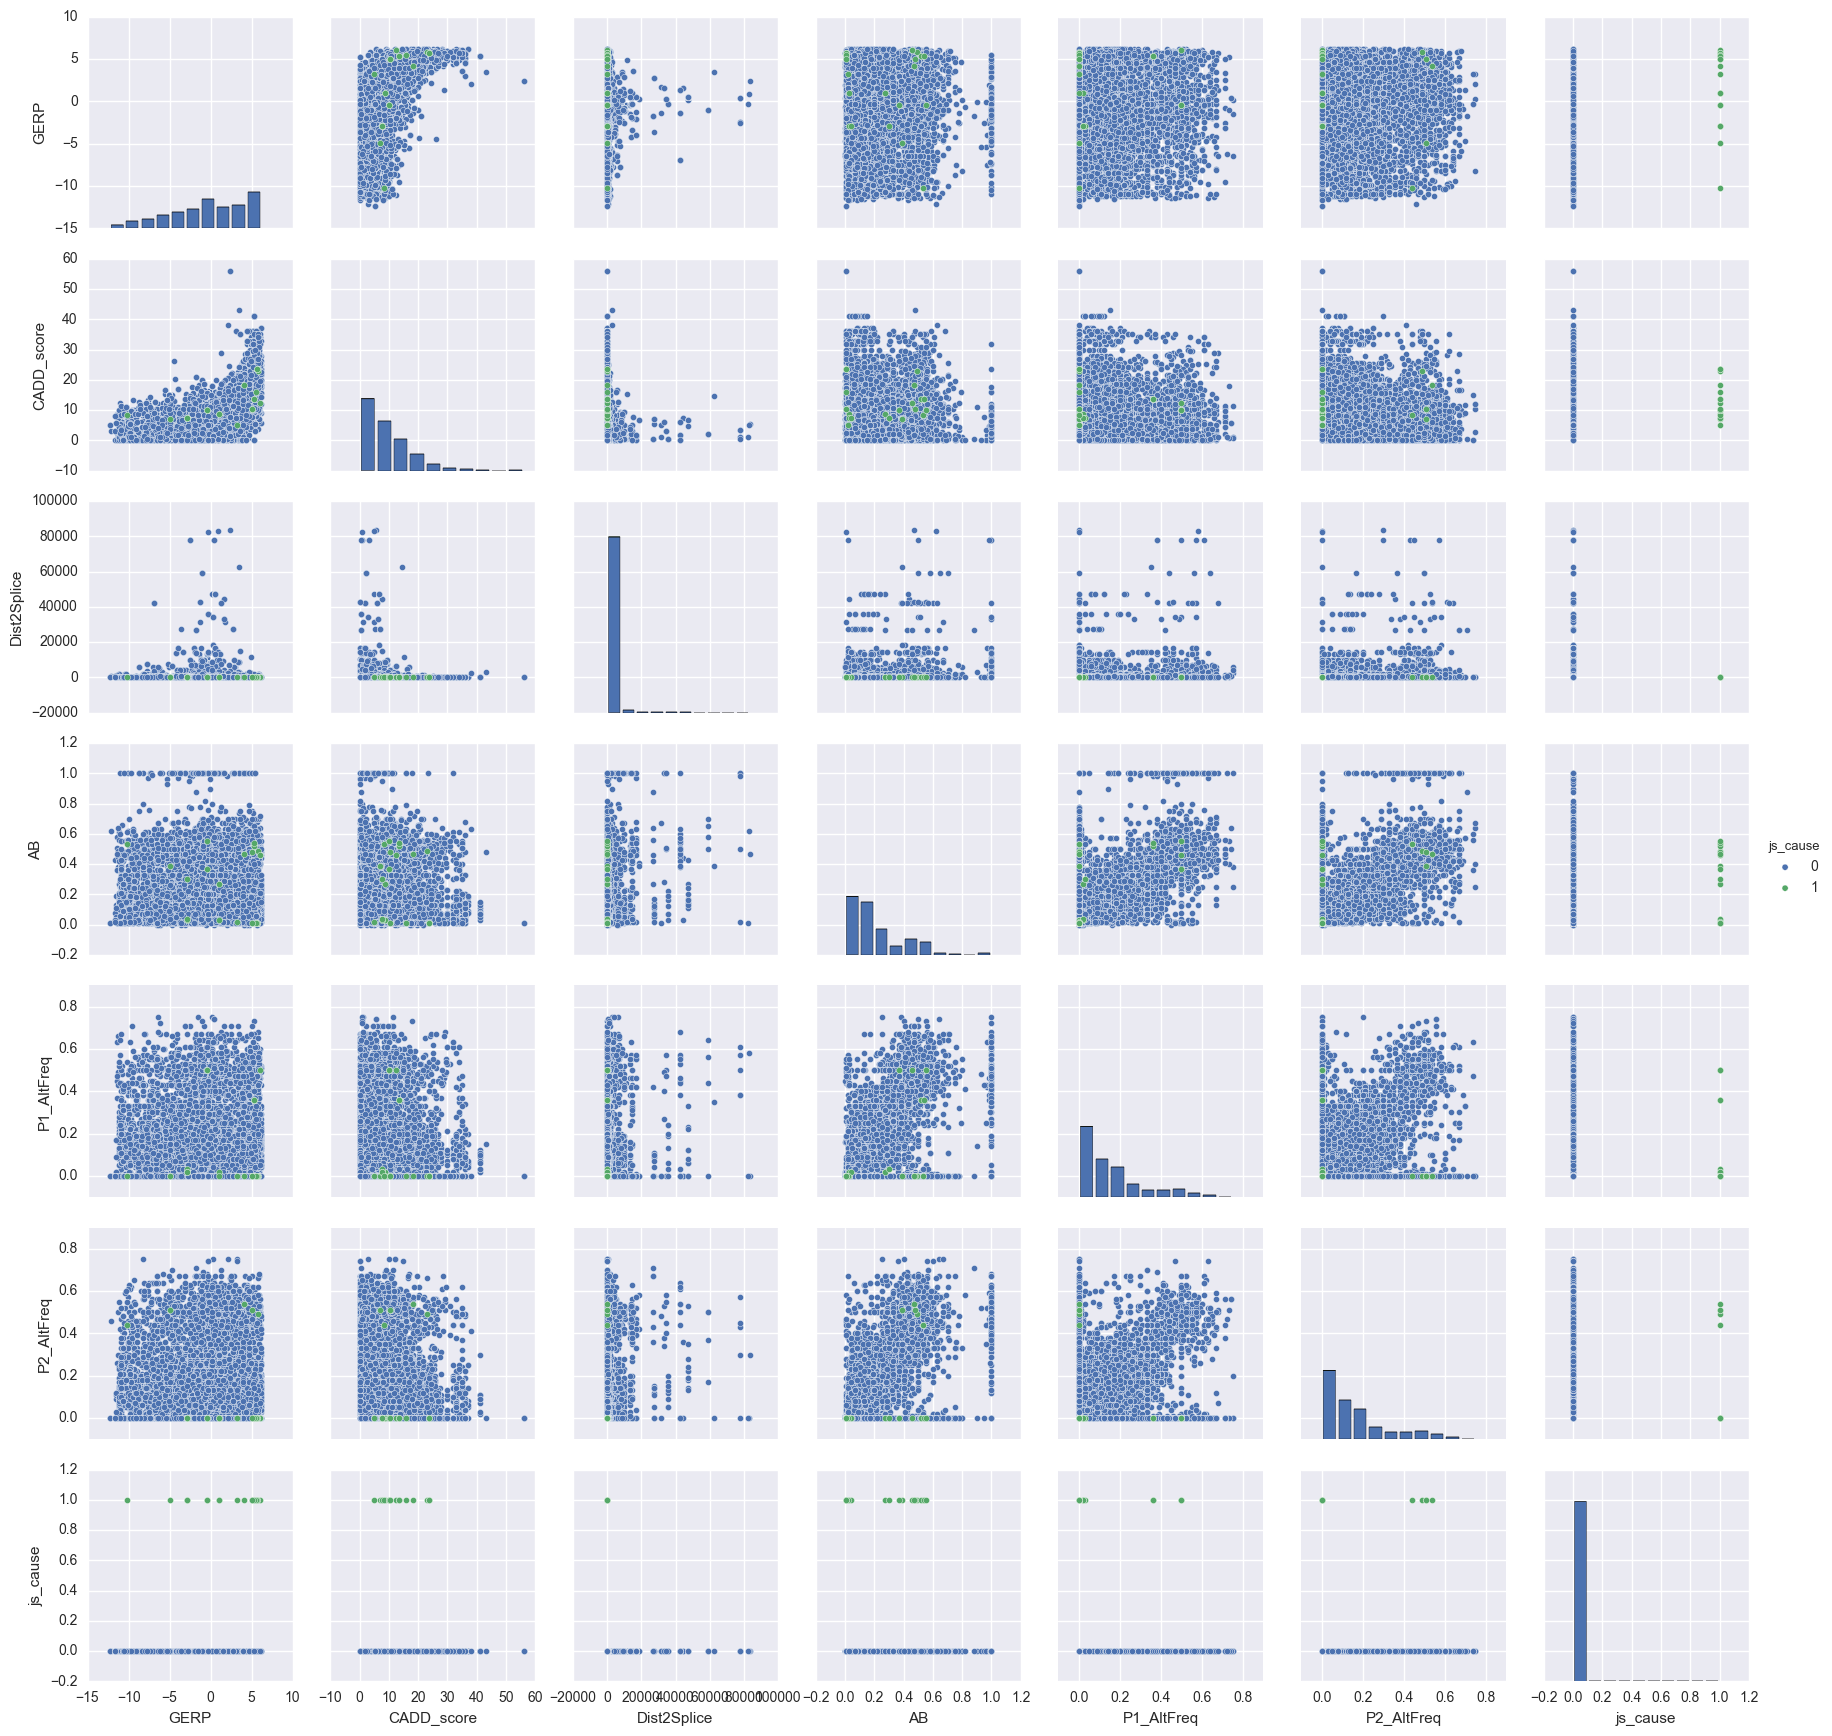

In [18]:
sns.pairplot(exomeJS, hue = 'js_cause')

In [19]:
#Do KNN here

In [20]:
z = exome['localization']
y = exome['localization']

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(4)
model.fit(X, y)

# define a function for fitting model, plotting the points, and 
# visualizing the decision boundary of the classifier
def plot_classifier_regions(model, X, y):
    G = np.unique(y)
    
    markers = ['o', 's', '>', '']
    for c, i in zip(G, range(len(G))):
        plt.plot(X[y==c, 0], 
                 X[y==c, 1], 
                 markers[c])
    
    xlim = [X[:, 0].min()-0.5, X[:, 0].max()+0.5]
    ylim = [X[:, 1].min()-0.5, X[:, 1].max()+0.5]    
    plt.xlim(xlim)
    plt.ylim(ylim)
    
    model.fit(X, y)
    
    # compute and plot boundaries
    h = 0.01
    xx, yy = np.meshgrid(np.arange(xlim[0], xlim[1], h),
                         np.arange(ylim[0], ylim[1], h))
    
    if hasattr(model, 'decision_function'):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='magma', alpha=.8)
    
    return model

C:\Users\hankc\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Users\hankc\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


MemoryError: 

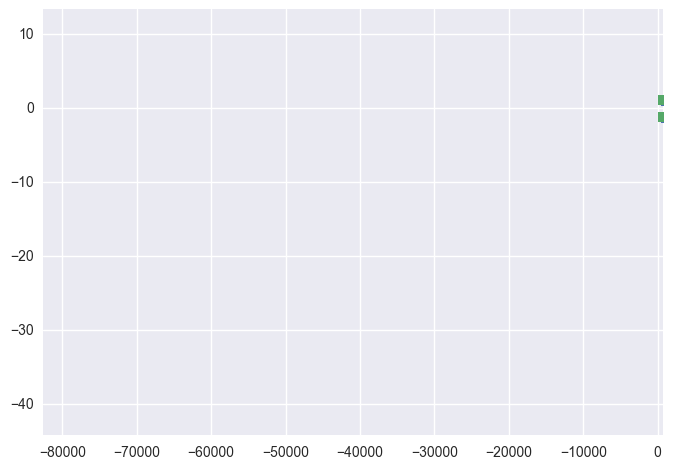

In [22]:
knn_model = plot_classifier_regions(KNeighborsClassifier(2), X, y)

C:\Users\hankc\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Users\hankc\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


MemoryError: 

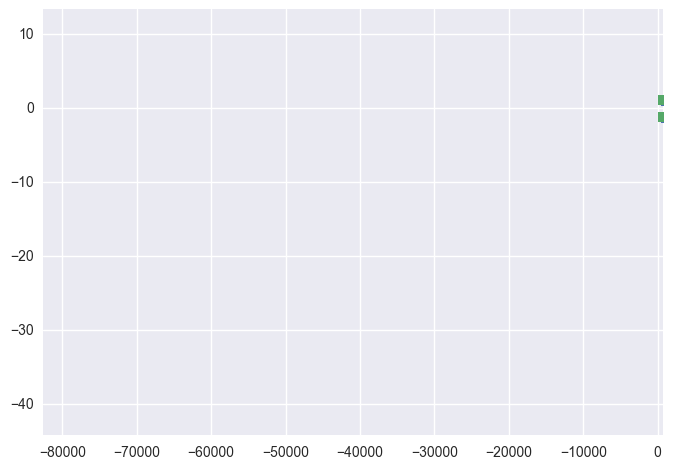

In [23]:
knn_model = plot_classifier_regions(KNeighborsClassifier(1), X, z)

In [26]:
# Megan: Creating new testing code with new data file including variants with no parental reads. KNN and SVM. Creating another new datafile with binary column for localization.
# Hank: Logistic regression, look at other classification models and justify classification models. I'll get started on writing the final report. 

In [ ]:
# Include logisitic regression here